# BI Assignment 3


### Prerequisites

In [3]:
isRunOnColab = False
if(isRunOnColab):
    from google.colab import drive
    drive.mount('/content/drive')

In [4]:
import nltk
# nltk.download('wordnet')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
plt.style.use('seaborn-muted')

### Reading the data and exploration

In [7]:
path_to_file = ''
if(isRunOnColab):
    path_to_file = 'drive/MyDrive/bi_assignments/data/it_courses_udemy.csv'
else:
    path_to_file = 'it_courses_udemy.csv'
df = pd.read_csv(path_to_file)

In [8]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22853 non-null  int64  
 1   title                         22853 non-null  object 
 2   url                           22853 non-null  object 
 3   is_paid                       22853 non-null  bool   
 4   num_subscribers               22853 non-null  int64  
 5   avg_rating                    22853 non-null  float64
 6   avg_rating_recent             22853 non-null  float64
 7   rating                        22853 non-null  float64
 8   num_reviews                   22853 non-null  int64  
 9   is_wishlisted                 22853 non-null  bool   
 10  num_published_lectures        22853 non-null  int64  
 11  num_published_practice_tests  22853 non-null  int64  
 12  created                       22853 non-null  object 
 13  p

In [10]:
df.shape

(22853, 20)

In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,22853.0,1.818466e+06,927352.464985,2762.0,1.090694e+06,1.824268e+06,2.604580e+06,3486006.0
num_subscribers,22853.0,3.205448e+03,11051.296472,0.0,7.600000e+01,5.590000e+02,2.483000e+03,564444.0
avg_rating,22853.0,3.952356e+00,0.875152,0.0,3.750000e+00,4.150000e+00,4.435480e+00,5.0
avg_rating_recent,22853.0,3.937739e+00,0.888605,0.0,3.732460e+00,4.148680e+00,4.433520e+00,5.0
rating,22853.0,3.937739e+00,0.888605,0.0,3.732460e+00,4.148680e+00,4.433520e+00,5.0
num_reviews,22853.0,2.702776e+02,2048.788093,0.0,8.000000e+00,2.700000e+01,9.800000e+01,188941.0
num_published_lectures,22853.0,3.491721e+01,48.652820,0.0,1.100000e+01,2.200000e+01,4.100000e+01,699.0
num_published_practice_tests,22853.0,3.752243e-01,1.160939,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.0
discount_price__amount,21024.0,4.862661e+02,234.100393,455.0,4.550000e+02,4.550000e+02,4.550000e+02,3200.0
price_detail__amount,22356.0,4.445518e+03,3098.531678,1280.0,1.280000e+03,3.200000e+03,8.640000e+03,12800.0


Transforming from string to date

In [12]:
df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])

Adding date as integer

In [13]:
df['created_int'] = pd.to_numeric(df['created'])
df['published_time_int'] = pd.to_numeric(df['published_time'])

<BarContainer object of 2 artists>

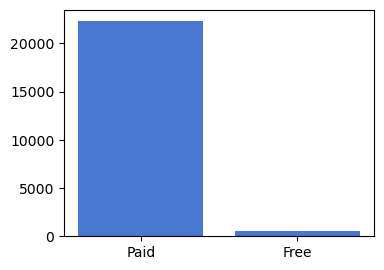

In [14]:
plt.figure(figsize=(4, 3), dpi=100)
plt.bar(['Paid', 'Free'] , df.is_paid.value_counts())

(array([2.1416e+04, 8.6500e+02, 2.8700e+02, 1.1200e+02, 4.6000e+01,
        3.5000e+01, 2.2000e+01, 1.9000e+01, 1.1000e+01, 7.0000e+00,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.  ,  11288.88,  22577.76,  33866.64,  45155.52,  56444.4 ,
         67733.28,  79022.16,  90311.04, 101599.92, 112888.8 , 124177.68,
        135466.56, 146755.44, 158044.32, 169333.2 , 180622.08, 191910.96,
        203199.84, 214488.72, 225777.6 , 237066.48, 248355.36, 259644.24,
        270933.12, 282

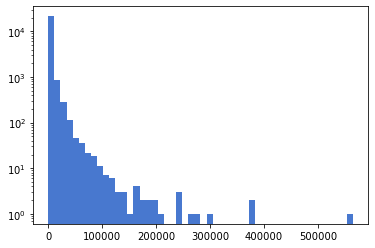

In [15]:
plt.hist(df['num_subscribers'], bins=50, log=True)

(array([2.150e+02, 0.000e+00, 1.690e+02, 0.000e+00, 1.210e+02, 9.900e+01,
        1.860e+02, 2.010e+02, 2.000e+02, 4.080e+02, 4.110e+02, 6.090e+02,
        6.100e+02, 6.240e+02, 7.870e+02, 7.930e+02, 7.190e+02, 7.710e+02,
        7.990e+02, 7.230e+02, 7.550e+02, 7.530e+02, 7.690e+02, 7.890e+02,
        8.190e+02, 9.330e+02, 1.237e+03, 1.039e+03, 1.073e+03, 1.015e+03,
        9.510e+02, 8.500e+02, 7.730e+02, 5.980e+02, 5.140e+02, 4.130e+02,
        3.380e+02, 2.480e+02, 2.000e+02, 1.190e+02, 8.300e+01, 4.700e+01,
        3.700e+01, 2.400e+01, 1.000e+01, 1.000e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 0.        ,  0.26487196,  0.52974393,  0.79461589,  1.05948786,
         1.32435982,  1.58923179,  1.85410375,  2.11897572,  2.38384768,
         2.64871965,  2.91359161,  3.17846357,  3.44333554,  3.7082075 ,
         3.97307947,  4.23795143,  4.5028234 ,  4.76769536,  5.03256733,
         5.29743929,  5.56231126,  5.82718322,  6.09205518,  6.35692715,
         6.

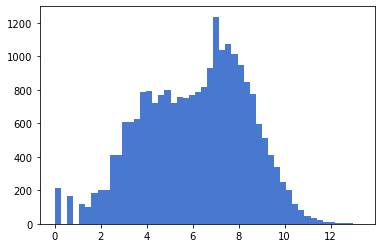

In [16]:
plt.hist(np.log(1+df['num_subscribers']), bins=50)

(array([6.840e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.600e+01, 3.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 9.000e+00, 7.000e+00,
        2.000e+01, 7.000e+00, 4.900e+01, 2.500e+01, 4.100e+01, 6.000e+01,
        8.000e+00, 1.010e+02, 8.300e+01, 1.540e+02, 1.410e+02, 6.900e+01,
        3.170e+02, 2.540e+02, 4.730e+02, 4.880e+02, 2.620e+02, 8.180e+02,
        8.120e+02, 1.411e+03, 1.242e+03, 7.650e+02, 2.368e+03, 1.335e+03,
        1.987e+03, 2.187e+03, 1.862e+03, 2.175e+03, 8.460e+02, 8.540e+02,
        2.940e+02, 5.850e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

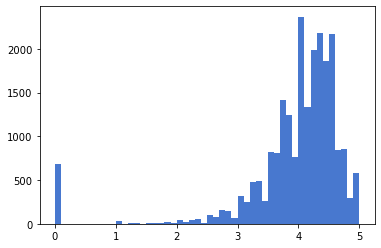

In [17]:
plt.hist(df['avg_rating'], bins=50)

### Number of courses created / published over the years

<AxesSubplot:xlabel='created'>

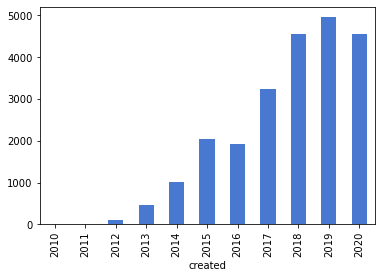

In [18]:
df.groupby(df["created"].dt.year)['id'].count().plot(kind="bar", legend=False)

<AxesSubplot:xlabel='published_time'>

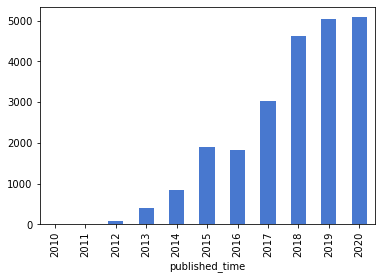

In [19]:
df.groupby(df["published_time"].dt.year)['id'].count().plot(kind="bar", legend=False)

In [20]:
df['title'].iloc[150:200]


150                       Understanding Unconscious Bias
151    How to Manage Difficult Conversations: Beginne...
152             Collaboration and Emotional Intelligence
153      Certificate in Qlik Sense Analytics Development
154    The Basics of Blockchain: Ethereum, Bitcoin, &...
155    Presentation Skills: Master Confident Presenta...
156    Interview Questions: Interview Like a Professi...
157    INTERVIEW TRAINING: Ask Better Questions, Hire...
158                          Learn about Content Writing
159    [BESTSELLER]™ Python Data Analysis & Visualiza...
160           Salesforce 101: Introduction to Salesforce
161                      Project Management Fundamentals
162    ISO 9001:2015 Quality Management System Audito...
163    Algorithmic Trading In Forex: Create Your Firs...
164    The Essential Guide to Entrepreneurship by Guy...
165    Think Strategically and Make Your Ideas a Reality
166           Manage Workplace Stress & Strike a Balance
167                           R

In [21]:
# is a beginner course
beginners_courses_idx = df['title'].str.contains('begin|start|intro|fundamental|basic|101|how to|foundation|rookie',case=False)
df['is_beginner'] = beginners_courses_idx


<AxesSubplot:title={'center':'Average # of subscribers'}, xlabel='is_beginner'>

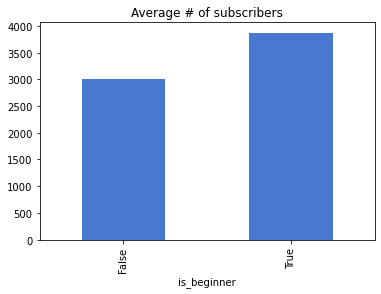

In [22]:
df.groupby(df["is_beginner"])['num_subscribers'].mean().plot(kind="bar", legend=False, title="Average # of subscribers")

In [23]:
advanced_idx = df['title'].str.contains('advanced|master|expert|professional',case=False)
df["is_advanced"] = advanced_idx

<AxesSubplot:title={'center':'Average # of subscribers'}, xlabel='is_advanced'>

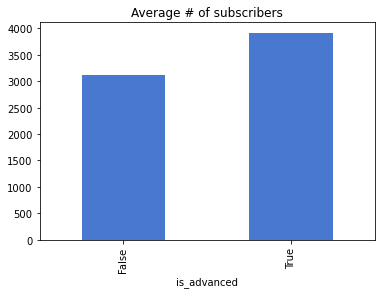

In [24]:
df.groupby(df["is_advanced"])['num_subscribers'].mean().plot(kind="bar", legend=False, title="Average # of subscribers")

In [25]:

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
import re

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to extract and stem the words from a column
def extract_terms(column):
    # Tokenize the words in the column
    words = word_tokenize(" ".join(df[column]))
    # Remove symbols and stopwords
    cleaned_words = [word for word in words if (word.isalpha() and word.lower() not in stop_words)]
    # Stem the words
    print('The' in cleaned_words)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
    # Count the most common terms
    print('lemmatized')
    print('The' in lemmatized_words)
    common_terms = [term[0] for term in Counter(lemmatized_words).most_common(10)]
    return (common_terms, lemmatized_words)

# Extract the terms from the 'text' column
common_terms, lemmatized_words = extract_terms("title")

False
lemmatized
False


In [27]:
common_terms = [term for term in Counter(lemmatized_words).most_common(20)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

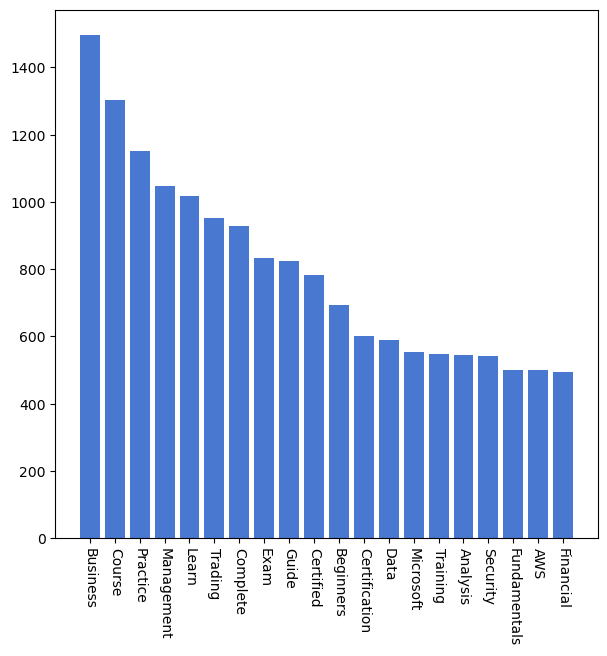

In [28]:
plt.figure(figsize=(7, 7), dpi=100)
plt.bar(*zip(*common_terms))
plt.xticks(rotation=-90)

### Correlation matrix

In [30]:
corr = df.drop(columns=['id']).corr(method='spearman').round(2)

<AxesSubplot:>

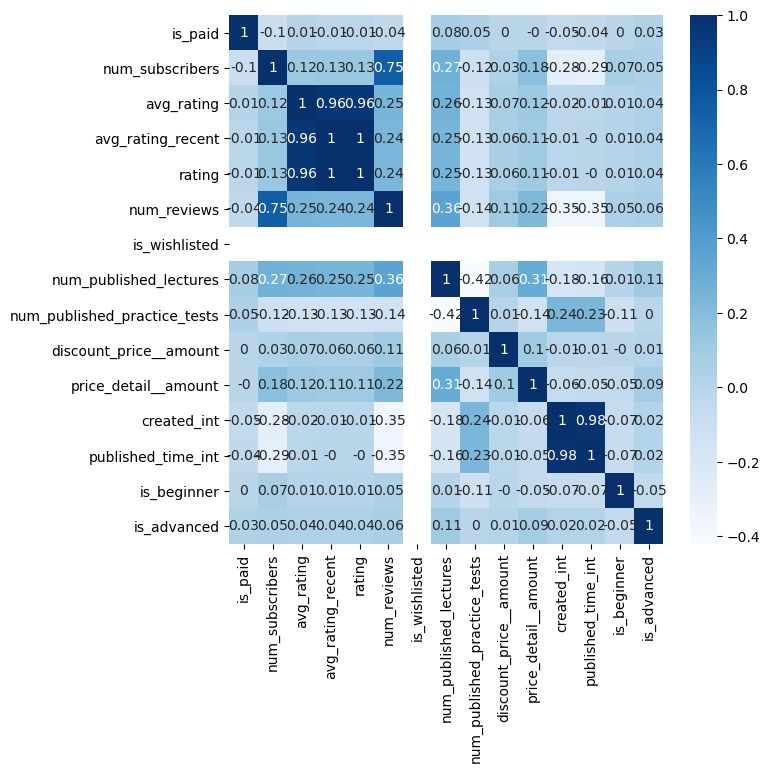

In [31]:
plt.figure(figsize=(7, 7), dpi=100)

sns.heatmap(corr,annot=True,xticklabels=True, cmap='Blues')

In [32]:
df.is_paid.value_counts()

True     22356
False      497
Name: is_paid, dtype: int64

In [33]:
pd.to_datetime(df['published_time']).max() #mention: data up to september 2020

Timestamp('2020-09-10 06:31:11+0000', tz='UTC')

#### Days since last published

In [34]:
from pandas.io.formats.info import DataFrameTableBuilderNonVerbose
lastpublished = pd.to_datetime(df['published_time']).max()

df['days_since_last_published'] = (lastpublished - pd.to_datetime(df['published_time'])).dt.days  

In [35]:
df['days_since_last_published']

0        1618
1        1478
2        1030
3        1694
4        1703
         ... 
22848     955
22849     990
22850     721
22851     638
22852    1892
Name: days_since_last_published, Length: 22853, dtype: int64

In [36]:
df['days_since_last_published'].corr(df['num_subscribers'])

0.08774825332799722

## Currency and NaNs

In [97]:
df.isna().sum() # how many null values each column has

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1829
discount_price__currency        1829
discount_price__price_string    1829
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
created_int                        0
published_time_int                 0
is_beginner                        0
is_advanced                        0
days_since_last_published          0
dtype: int64

In [37]:
df['discount_price__currency'].value_counts(dropna=False)

INR    21024
NaN     1829
Name: discount_price__currency, dtype: int64

For discounted price, we can look at which have null and are free. (probably all free have Null values here)
-> impute by setting these to 0

In [38]:
df['price_detail__currency'].value_counts(dropna=False)

INR    22356
NaN      497
Name: price_detail__currency, dtype: int64

In [98]:
df.loc[df['discount_price__currency'].isna() & df['is_paid']].shape[0] # number of paid and no discount price

1333

For these we can set the discount price to the original price. (they probably never had a discount)

In [136]:
outlier = df.loc[df['price_detail__currency'].isna() & df['is_paid']] #outlier
print(outlier)

outlier_indices = outlier.index


            id                                       title  \
13607  2935720  Acabou a Previdência e agora? -  Volume 03   

                                                   url  is_paid  \
13607  /course/acabou-a-previdencia-e-agora-volume-03/     True   

       num_subscribers  avg_rating  avg_rating_recent  rating  num_reviews  \
13607                0         0.0                0.0     0.0            0   

       is_wishlisted  ...  discount_price__currency  \
13607          False  ...                       NaN   

       discount_price__price_string price_detail__amount  \
13607                           NaN                  NaN   

      price_detail__currency  price_detail__price_string          created_int  \
13607                    NaN                         NaN  1585595458000000000   

        published_time_int  is_beginner is_advanced days_since_last_published  
13607  1585845212000000000        False       False                       160  

[1 rows x 25 columns]


13607

In [137]:
outlier_indices

Int64Index([13607], dtype='int64')

## Notes 
Incorporate published_time >> relevant for popularity. If more recent -> needs less subscribers

Treat as time series (take most recent data points for testing)

Add to additional data requirements: 
    When did subscribers subscribe (maximal number of subscribers over all years)
       there might be less subs now if the course is old and the content of the course is outdated etc.

Consider the old courses (2010-2014) because there are very few of them. How to handle them. The data is probably not relevant. 

Consider the updates of the courses (some are updated some are not) consider updated_timestamp (which are not present in current dataset).


Converting the price after modeling (for the company management)

✅ Avg/total number of subs per year (based on `published_time`). -> interesting for marketing and sales 

Is published date == updated date? unclear

✅ look at (published-created) distribution ---->>> Derived attribute (daysinbetweendates/int)

✅ Are there courses with same/similar titles? (e.g. `VU Business Intelligence WS2022` and `VU Business Intelligence WS2023`


## Courses with similar / same titles

In [40]:
first_3_chars = df['title'].str[:30]
duplicated_rows = df[first_3_chars.duplicated()]
print(duplicated_rows.shape[0])
duplicated_rows.sort_values('title')

1133


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int,is_beginner,is_advanced,days_since_last_published
22550,2662338,1Z0-068 : Oracle Database 12c: RAC and Grid Pr...,/course/1z0-068-oracle-database-12c-rac-and-gr...,True,116,4.83333,4.83896,4.83896,3,False,...,INR,₹455,1280.0,INR,"₹1,280",1574143081000000000,1574345032000000000,False,False,293
19111,3074042,1Z0-1072 Oracle Cloud Infrastructure 2019 Arch...,/course/1z0-1072-oracle-cloud-infrastructure-2...,True,68,4.22727,4.10804,4.10804,20,False,...,INR,₹455,1920.0,INR,"₹1,920",1588285857000000000,1588288989000000000,False,False,132
20327,3362370,1Z0-1084-20 Oracle Cloud Infrastructure Develo...,/course/1z0-1084-20-oracle-cloud-infrastructur...,True,107,4.59091,4.60577,4.60577,11,False,...,INR,₹455,1280.0,INR,"₹1,280",1595611799000000000,1595892180000000000,False,False,44
18334,3060372,1Z0-1085-20 Oracle Cloud Infrastructure Founda...,/course/1z0-1085-20-oracle-cloud-infrastructur...,True,61,4.45000,4.64272,4.64272,30,False,...,INR,₹455,1280.0,INR,"₹1,280",1588016108000000000,1588025959000000000,True,False,135
22812,3078234,1Z0-931 - Oracle Autonomous Database Cloud 201...,/course/1z0-931-oracle-autonomous-database-clo...,True,2,3.25000,3.05000,3.05000,2,False,...,INR,₹455,1280.0,INR,"₹1,280",1588373639000000000,1588382382000000000,False,False,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,1665560,Windows Server 2016 with Powershell: Using WMI...,/course/windows-server-2016-with-powershell-us...,True,113,3.00000,3.10006,3.10006,19,False,...,INR,₹455,8640.0,INR,"₹8,640",1524828896000000000,1525290260000000000,False,False,861
21246,1551046,Windows Server 2016 with Powershell: Working w...,/course/windows-server-2016-with-powershell-wo...,True,86,4.71429,4.56666,4.56666,7,False,...,INR,₹455,7680.0,INR,"₹7,680",1518428682000000000,1519268079000000000,False,False,931
10481,951218,You can Pass the Certified Management Accounta...,/course/cma-exam-2-review-financial-decision-m...,True,141,3.91667,3.69408,3.69408,6,False,...,INR,₹455,1280.0,INR,"₹1,280",1473140351000000000,1490043946000000000,False,False,1269
15449,2918344,[NEW] AWS Certified Cloud Practitioner From Sc...,/course/aws-certified-cloud-practitioner-exam-...,True,20011,4.22000,4.22587,4.22587,175,False,...,INR,₹640,2560.0,INR,"₹2,560",1585282434000000000,1591231801000000000,False,False,98


Text(0, 0.5, '# of courses with this name')

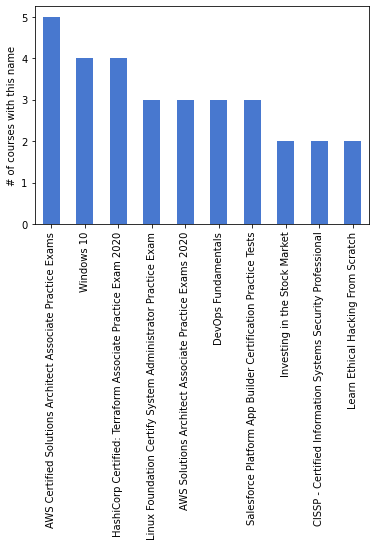

In [43]:
df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(10).plot(kind="bar")
plt.ylabel("# of courses with this name")

In [44]:
print(f"All courses with name: {df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(1).index[0]}\n (the course with the most identical titles)")

All courses with name: AWS Certified Solutions Architect Associate Practice Exams
 (the course with the most identical titles)


In [45]:
most_frequent_course_instances= df.loc[df['title'] == df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(1).index[0]]

In [46]:
most_frequent_course_instances['created']

13634   2018-01-22 01:22:04+00:00
13713   2018-08-27 02:20:35+00:00
17107   2020-01-02 06:14:20+00:00
17264   2020-05-12 06:34:26+00:00
19582   2020-01-28 22:56:56+00:00
Name: created, dtype: datetime64[ns, UTC]

We see that the course was was created twice in 2018 (summer and winter semester?)
twice in jan of 2020, might be an artefact

In [47]:
(df['url'].duplicated()).any()

False

No duplicated urls.

Example of two different urls for the AWS course:

In [48]:
df.loc[ df['title'] == df.loc[ 18168, 'title']]['url'][14054]

'/course/aws-certified-cloud-practitioner-practice-exams-amazon/'

In [49]:
df.loc[ df['title'] == df.loc[ 18168, 'title']]['url'][18168]


'/course/aws-certified-cloud-practitioner-practice-exam-o/'

## Published - created distribution

In [50]:
date_diff = (df['published_time'] - df['created']).dt.days

In [51]:
date_diff.describe()

count    22853.000000
mean        49.519275
std        124.580745
min         -1.000000
25%          3.000000
50%         12.000000
75%         40.000000
max       2186.000000
dtype: float64

Mean is 50, but Median (0.5 quantile) is more robust towards outliers -> on average we could say that 12 days passes between course creation and course publishing.

There is -1??? (published one day before created)

In [52]:
df.loc[date_diff == -1]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int,is_beginner,is_advanced,days_since_last_published
686,2762,Simple Strategy for Swing Trading the Stock Ma...,/course/swing-trading-the-stock-market/,True,2268,4.21642,4.22936,4.22936,674,False,...,INR,₹468,2560.0,INR,"₹2,560",1271280766000000000,1271262766000000000,False,False,3801


Following is the distribution of the duration between publishing and course creation (y on the log scale)

Text(0, 0.5, 'Frequency')

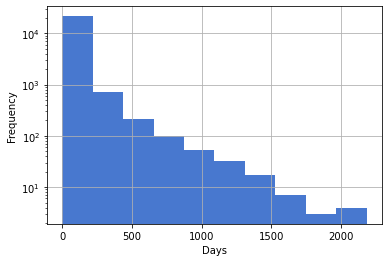

In [53]:
date_diff.hist( log=True)
plt.xlabel('Days')
plt.ylabel('Frequency')

## Avg num of subscribers / rating for paid vs free courses

([<matplotlib.axis.XTick at 0x12bac88d6a0>,
 [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

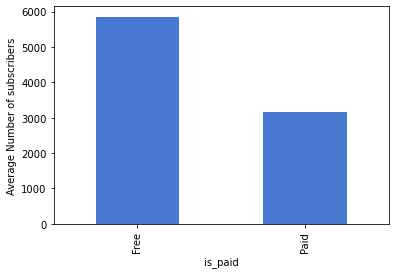

In [103]:
df.groupby(df["is_paid"])['num_subscribers'].mean().plot(kind="bar", legend=False)
plt.ylabel("Average Number of subscribers")
plt.xticks(ticks=[0, 1] , labels=['Free', 'Paid'])

([<matplotlib.axis.XTick at 0x12bae5446a0>,
 [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

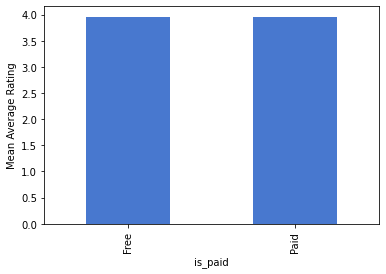

In [104]:
df.groupby(df["is_paid"])['avg_rating'].mean().plot(kind="bar", legend=False)
plt.ylabel("Mean Average Rating")
plt.xticks(ticks=[0, 1] , labels=['Free', 'Paid'])

On average free courses have around two times more subscribers than paid courses, while both paid and free courses have approximately equal mean average ratings. (Mean average because the `avg_rating` is already an average)

### Courses with no subscribers

How many:

In [106]:
df.loc[df["num_subscribers"] < 1].shape[0]

215

When were these courses created:

Text(0, 0.5, 'Number of courses with no subscribers')

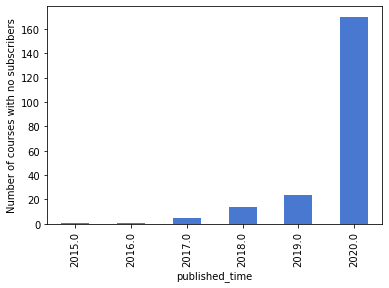

In [108]:
no_subs = df.loc[df["num_subscribers"] < 1]
df.groupby(no_subs["published_time"].dt.year)['id'].count().plot(kind="bar", legend=False)
plt.ylabel('Number of courses with no subscribers')

What percentage of courses from 2020 have 0 subscribers:

In [118]:
ratio_no_subs_in2020 = no_subs["published_time"].dt.year.value_counts()[2020]/df["published_time"].dt.year.value_counts()[2020]
print(f'{np.round(ratio_no_subs_in2020 * 100, 2)} %')

3.34 %


Rows that have no subscribers but at least one review:

In [57]:
df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1]

<ipython-input-57-01bd099cb5b5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1]


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int,is_beginner,is_advanced,days_since_last_published
10898,2542935,Learn the truth about wealth creation,/course/truth-about-wealth-creation/,True,0,3.00,3.00000,3.00000,1,False,...,INR,₹455,1280.0,INR,"₹1,280",1567584063000000000,1568161438000000000,False,False,365
10950,3106416,Series 7 tests by topic + Full Exam,/course/series-7-tests/,True,0,5.00,5.00000,5.00000,1,False,...,NaN,NaN,2240.0,INR,"₹2,240",1588994549000000000,1589747850000000000,False,False,115
12905,3149864,Planilha Pronta - Conciliação Bancária,/course/planilha-pronta-conciliacao-bancaria/,True,0,2.75,3.19403,3.19403,2,False,...,INR,₹455,1280.0,INR,"₹1,280",1589978672000000000,1589984848000000000,False,False,112
13049,3428016,Forex MasterClass de Cero a Avanzado- Ejemplos...,/course/forex-masterclass-de-cero-a-avanzado-e...,True,0,5.00,5.00000,5.00000,1,False,...,NaN,NaN,12800.0,INR,"₹12,800",1597708770000000000,1598045671000000000,False,True,19


Since there are only few of such rows, we assume a user cannot unsubscribe from the course. Therefore we will remove them and consider them as outliers.

In [138]:
outlier_indices.append(df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1].index)

<ipython-input-138-619d36770e94>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_indices.append(df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1].index)


Int64Index([13607, 10898, 10950, 12905, 13049], dtype='int64')

<ipython-input-135-8e24dd04c6c1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1].index


Int64Index([10898, 10950, 12905, 13049], dtype='int64')

## Number of subscribers over the years for all courses

---



Text(0, 0.5, 'Total Number of subscribers')

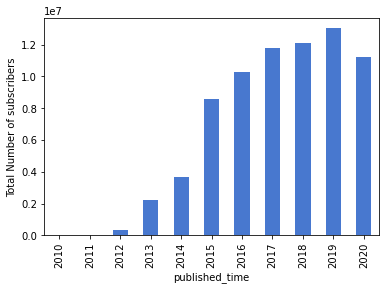

In [58]:
df.groupby(df["published_time"].dt.year)['num_subscribers'].sum().plot(kind="bar", legend=False)
plt.ylabel('Total Number of subscribers')

Text(0, 0.5, 'Average Number of subscribers')

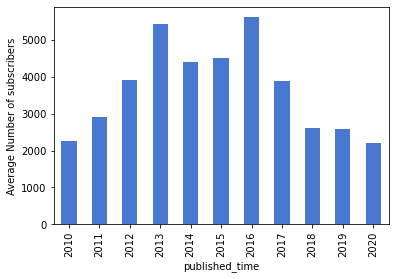

In [59]:
df.groupby(df["published_time"].dt.year)['num_subscribers'].mean().plot(kind="bar", legend=False)
plt.ylabel('Average Number of subscribers')

The first plot could be informative for the sales department. As expected with any company, after reaching the saturation of users, the total number of subscribers per year does not change drastically after a certain point.
 
Second, not so sure where it could be used. Maybe to analyze the average course quality over the years. i.e. maybe the content of the courses from 2013 and 2016 was of higher quality on average than for other years

Text(0, 0.5, 'Number of courses')

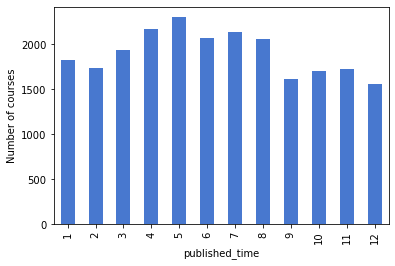

In [144]:
df.groupby(df["published_time"].dt.month)['id'].count().plot(kind="bar", legend=False)
plt.ylabel('Number of courses')

## Modeling

### Removing the 5 outliers

In [140]:
df = df.drop(outlier_indices)

## Splitting the data

In [141]:
# sorted by days_since_last_published (ascending) 
sorted = df.sort_values('days_since_last_published').reset_index(drop=True)

num_of_obs_for_testing = int(np.round(sorted.shape[0] * 0.2))
print(f"For testing: {num_of_obs_for_testing}")

test_set = sorted.iloc[:num_of_obs_for_testing, :]
rest = sorted.iloc[num_of_obs_for_testing:, :]

For testing: 4570


In [142]:
test_set.published_time

0      2020-09-10 06:31:11+00:00
1      2020-09-08 20:22:19+00:00
2      2020-09-09 02:11:42+00:00
3      2020-09-08 19:55:04+00:00
4      2020-09-08 21:12:24+00:00
                  ...           
4565   2020-02-04 17:59:29+00:00
4566   2020-02-04 17:57:32+00:00
4567   2020-02-04 09:08:06+00:00
4568   2020-02-04 17:46:41+00:00
4569   2020-02-04 19:25:42+00:00
Name: published_time, Length: 4570, dtype: datetime64[ns, UTC]

In testing set: observations from 04.02.2020 until 10.09.2020

In [86]:
from sklearn.model_selection import train_test_split

X = rest.drop(columns=['num_subscribers'])
y = rest.num_subscribers
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=45)

### Cleaning the data

Removing the constant and unique columns (id, title, url)

In [143]:
X.columns

Index(['id', 'title', 'url', 'is_paid', 'avg_rating', 'avg_rating_recent',
       'rating', 'num_reviews', 'is_wishlisted', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'published_time',
       'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string', 'created_int',
       'published_time_int', 'is_beginner', 'is_advanced',
       'days_since_last_published'],
      dtype='object')

In [100]:
X = X.drop(columns=['id', 'title', 'url', 'is_wishlisted', 
                    'discount_price__currency', 'discount_price__price_string',
                   'price_detail__currency', 'price_detail__price_string'])

id                              False
title                           False
url                             False
is_paid                         False
num_subscribers                 False
avg_rating                      False
avg_rating_recent               False
rating                          False
num_reviews                     False
is_wishlisted                   False
num_published_lectures          False
num_published_practice_tests    False
created                         False
published_time                  False
discount_price__amount           True
discount_price__currency         True
discount_price__price_string     True
price_detail__amount             True
price_detail__currency           True
price_detail__price_string       True
created_int                     False
published_time_int              False
is_beginner                     False
is_advanced                     False
days_since_last_published       False
dtype: bool

### Establishing a baseline

### Model selection

### Hyperparameter tuning

### Final model training

### Model evaluation

## Results discussion / analysis